## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128],regularizer=l2, ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regularizer(ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regularizer(ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
RATIO = {l1:[1e-2, 1e-4, 1e-8],
        l1_l2:[1e-2, 1e-4, 1e-8]}

In [25]:
results = {}

for i in RATIO:
    for j in RATIO[i]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %s" % str(i) + "%.6f" % (j))
        model = build_mlp(input_shape=x_train.shape[1:], regularizer = i,ratio= j)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "exp-%s" % str(i) + "%.6f" % (j)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Regulizer = <function l1 at 0x000002959F32CBF8>0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 s

50000/50000 [==============================] - 18s 367us/step - loss: 2.3100 - accuracy: 0.1889 - val_loss: 2.2970 - val_accuracy: 0.1989
Epoch 49/50
50000/50000 [==============================] - 18s 363us/step - loss: 2.3122 - accuracy: 0.1884 - val_loss: 2.3529 - val_accuracy: 0.1801
Epoch 50/50
50000/50000 [==============================] - 18s 368us/step - loss: 2.3081 - accuracy: 0.1880 - val_loss: 2.5484 - val_accuracy: 0.1306
Experiment with Regulizer = <function l1 at 0x000002959F32CBF8>0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________

C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (2.698165). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.351081). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 21s 425us/step - loss: 2.6495 - accuracy: 0.6118 - val_loss: 2.9242 - val_accuracy: 0.5078
Epoch 37/50
50000/50000 [==============================] - 18s 350us/step - loss: 2.6083 - accuracy: 0.6129 - val_loss: 2.8794 - val_accuracy: 0.5096
Epoch 38/50
50000/50000 [==============================] - 17s 348us/step - loss: 2.5628 - accuracy: 0.6167 - val_loss: 2.8435 - val_accuracy: 0.5136
Epoch 39/50
50000/50000 [==============================] - 17s 350us/step - loss: 2.5224 - accuracy: 0.6172 - val_loss: 2.7541 - val_accuracy: 0.5239
Epoch 40/50
50000/50000 [==============================] - 18s 353us/step - loss: 2.4791 - accuracy: 0.6201 - val_loss: 2.7331 - val_accuracy: 0.5254
Epoch 41/50
50000/50000 [==============================] - 21s 420us/step - loss: 2.4418 - accuracy: 0.6231 - val_loss: 2.7900 - val_accuracy: 0.5002
Epoch 42/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.4023 - accuracy: 0.6250 - va

50000/50000 [==============================] - 19s 375us/step - loss: 1.0726 - accuracy: 0.6220 - val_loss: 1.3494 - val_accuracy: 0.5278
Epoch 34/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.0595 - accuracy: 0.6261 - val_loss: 1.3336 - val_accuracy: 0.5311
Epoch 35/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.0471 - accuracy: 0.6320 - val_loss: 1.4105 - val_accuracy: 0.5121
Epoch 36/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.0331 - accuracy: 0.6366 - val_loss: 1.3637 - val_accuracy: 0.5299
Epoch 37/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.0214 - accuracy: 0.6413 - val_loss: 1.3460 - val_accuracy: 0.5318
Epoch 38/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.0112 - accuracy: 0.6449 - val_loss: 1.3564 - val_accuracy: 0.5213
Epoch 39/50
50000/50000 [==============================] - 16s 313us/step - loss: 0.9953 - accuracy: 0.6515 - va

50000/50000 [==============================] - 19s 372us/step - loss: 2.3649 - accuracy: 0.1874 - val_loss: 2.4809 - val_accuracy: 0.1596
Epoch 31/50
50000/50000 [==============================] - 18s 363us/step - loss: 2.3561 - accuracy: 0.1878 - val_loss: 2.3360 - val_accuracy: 0.1920
Epoch 32/50
50000/50000 [==============================] - 19s 384us/step - loss: 2.3495 - accuracy: 0.1899 - val_loss: 2.3328 - val_accuracy: 0.1984
Epoch 33/50
50000/50000 [==============================] - 18s 354us/step - loss: 2.3458 - accuracy: 0.1871 - val_loss: 2.3248 - val_accuracy: 0.1984
Epoch 34/50
50000/50000 [==============================] - 19s 389us/step - loss: 2.3364 - accuracy: 0.1887 - val_loss: 2.3653 - val_accuracy: 0.1860
Epoch 35/50
50000/50000 [==============================] - 22s 430us/step - loss: 2.3370 - accuracy: 0.1890 - val_loss: 2.4076 - val_accuracy: 0.1745
Epoch 36/50
50000/50000 [==============================] - 18s 368us/step - loss: 2.3298 - accuracy: 0.1886 - va

50000/50000 [==============================] - 18s 365us/step - loss: 1.6356 - accuracy: 0.5168 - val_loss: 1.7842 - val_accuracy: 0.4573
Epoch 28/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.6197 - accuracy: 0.5171 - val_loss: 1.7964 - val_accuracy: 0.4581
Epoch 29/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.6168 - accuracy: 0.5194 - val_loss: 1.6706 - val_accuracy: 0.4905
Epoch 30/50
50000/50000 [==============================] - 18s 364us/step - loss: 1.5981 - accuracy: 0.5245 - val_loss: 1.6607 - val_accuracy: 0.4926
Epoch 31/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.5986 - accuracy: 0.5184 - val_loss: 1.6639 - val_accuracy: 0.4953
Epoch 32/50
50000/50000 [==============================] - 18s 370us/step - loss: 1.5962 - accuracy: 0.5197 - val_loss: 1.7242 - val_accuracy: 0.4697
Epoch 33/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.5858 - accuracy: 0.5245 - va

50000/50000 [==============================] - 19s 383us/step - loss: 1.6084 - accuracy: 0.5464 - val_loss: 1.7430 - val_accuracy: 0.4926
Epoch 25/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.5726 - accuracy: 0.5482 - val_loss: 1.6494 - val_accuracy: 0.5109
Epoch 26/50
50000/50000 [==============================] - 19s 380us/step - loss: 1.5382 - accuracy: 0.5516 - val_loss: 1.6481 - val_accuracy: 0.5080
Epoch 27/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.5139 - accuracy: 0.5536 - val_loss: 1.6372 - val_accuracy: 0.5081
Epoch 28/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.4883 - accuracy: 0.5576 - val_loss: 1.7086 - val_accuracy: 0.4786
Epoch 29/50
50000/50000 [==============================] - 18s 364us/step - loss: 1.4694 - accuracy: 0.5567 - val_loss: 1.5799 - val_accuracy: 0.5091
Epoch 30/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.4514 - accuracy: 0.5581 - va

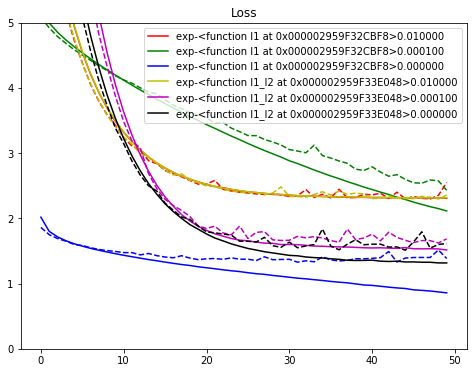

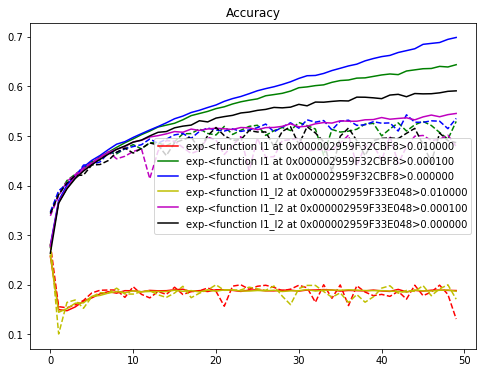

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()